# Key Insights

### Job location is the top deciding factor of data analysts' salary variation in this dataset (R-Square 26%). 
Overall average estimated salary of a data analyst is USD 72K, and median is USD 69K, whereas a data analyst in California earns USD 88K on average, USD 81K as median. Salaries in San Jose and San Francisco are proven by graphs to be even higher.
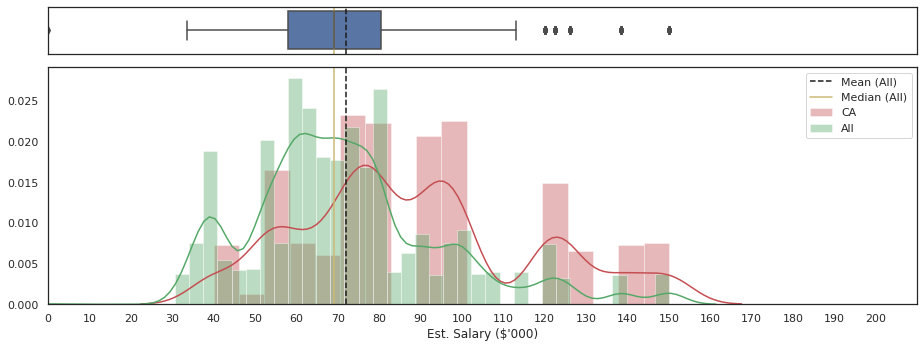

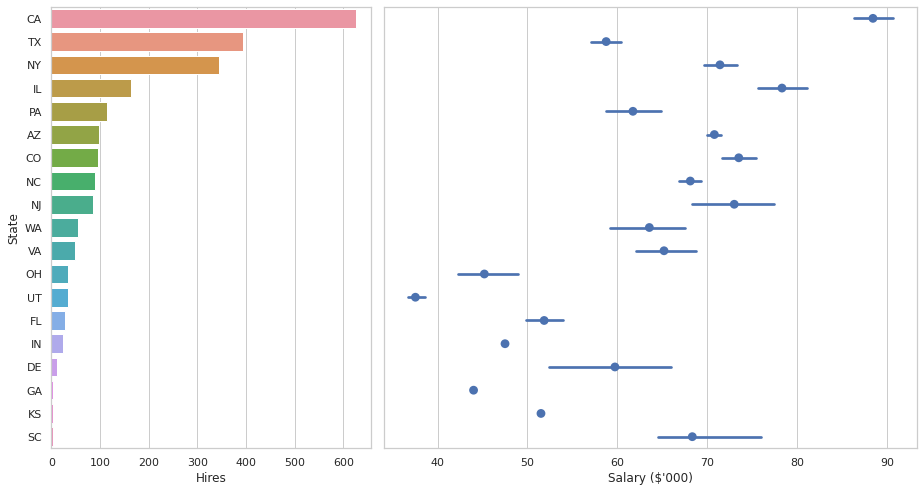

### Larger firms do not necessarily pay more to data analysts.
Instead, high demands with higher salaries are found in clusters such as follows. These high-paying firms are mostly private companies with a lot higher ratings on Glassdoor and are much younger.

* **Mid-large firms (employees 1K-5K  & revenues USD100-500M)** 
* **Small businesses (employees <50 & < revenues USD5M)**
* **Small-medium businesses (51-200 employees with revenues unknown)**
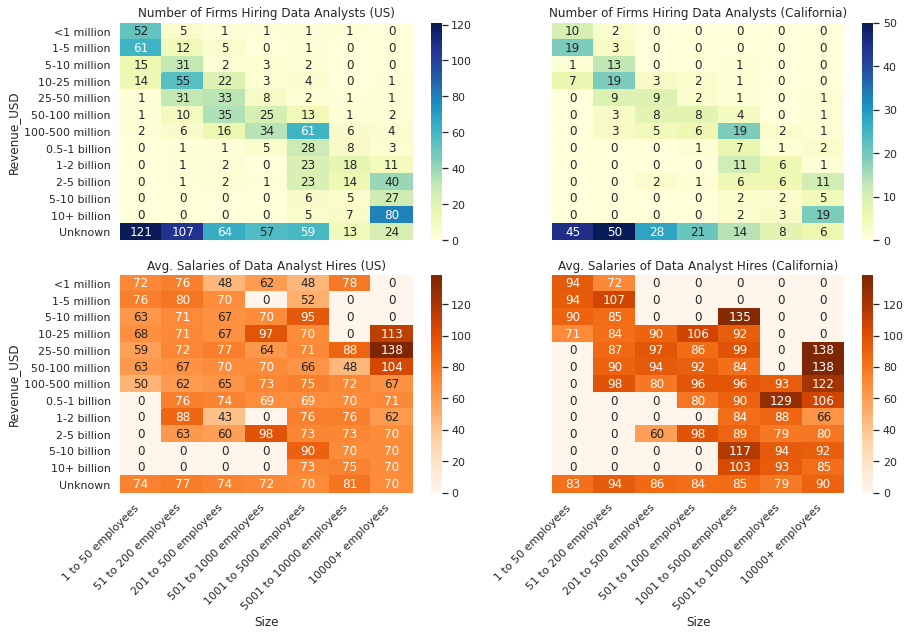

### SQL & Excel - basics; Python & technical degrees - nice to have; MYSQL - bonused in the IT & Consulting firms niche in California.
60% of analyst jobs require/prefer SQL experience; 40% require/prefer intensive Excel skills; 30% require/prefer Python experience, Master degrees or Computer Science degrees. **Less than 4% of positions require/prefer experience with MYSQL, but they come with higher pay (+USD 5K)**.
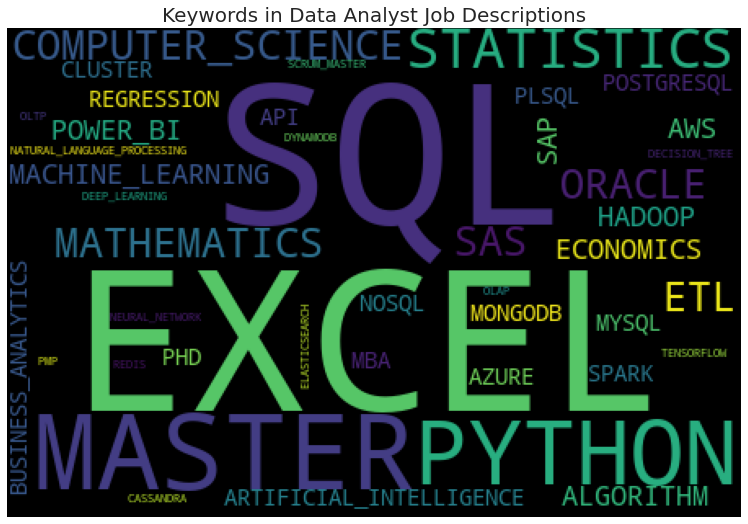

## Insights from Regression
### While salaries for PHD analysts in other states stand out, it is not the case in California. 
The final regression model shows simply being in California can raise salary. It does not matter whether the position require/prefer a PHD degree. Possible explanations I came up as follows. Your thought? 
1. Too many job applicants in CA have PHD degrees, so HR can easily hire PHD without requiring it; and PHD's are hired with premium salaries regardless if the job description requires so.
2. Non-PHD job applicants in CA possess other expertises as valuable as PHD degrees.

### An IT job is not a high-pay guarantee unless it is based in California.
In terms of industries and sectors, top demands come from IT, business services (62% are staffing & outsourcing firms) , finance and healthcare (including biotech & pharmaceuticals). However, only positions in California from IT companies are significantly paid higher (USD 25K higher holding other variables constant).

### New Jersey based companies are smaller but more generous.
While headquarters' locations are not so much correlated with salaries as job locations are, those 74 **companies headquartered in New Jersey pay USD 5K higher** holding other variables constant. The small businesses (employees <50 & < revenues USD5M) share among NJ-based companies is 3 times higher than the average.

### Other than a junior position, the job title does not matter.
While a 'Junior' position is well expected to receive lower salaries (3K-8K lower), the correlations with other seniority wordings such as 'Lead', 'Senior', 'I', 'II' and 'III' are seen and expected in initial models but not significant after controlling job locations. The correlation with functional keywords such as marketing and financial are not significant as well.

# About
## Dataset
This dataset was created by [picklesueat](https://github.com/picklesueat/data_jobs_data) and contains more than 2000 job listing for data analyst positions (all assumed to be open positions at the time the dataset was published in July 2020), with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.
  
## The Work
This is my first Python data visualisation project on Kaggle. I began with adopting Yashvi Patel's library and dataset import, data exploration and cleaning and some of the visualisations. And then I incorporated different visualisation techniques and regressions from various sources.

## Objectives
* What kind of jobs get higher salaries? (Job Title, Job Description, EasyApply)
* What kind of companies pay more? (Rating, Company, Size, *Years established (now - Founded)*, Type of ownership, Industry & Sector, Revenue)
* Does job/headquarters location matter to salaries?

## Methodologies

1. Exploratory Data Analysis (distribution, boxplot, barcharts, errorbars, heatmaps, scatterplots...etc.)
2. T-test
3. Multiple Regression

## Limitations and Assumptions

* The results only reflet the outcome at the time the dataset was published, which is pressumed to be July 2020. Seasonal variation is disregarded (not a time-series data).
* Somehow only 27 positions are found 'remote' in this dataset. The impact of pandemic (more jobs becoming remote) is unclear.
* The salary estimates come from Glassdoor, which may not reflect the actual salaries.
* The dataset is assumed to reflect the traits of the actual job market.
* The salaries are nominal, not adjusted by living costs or consumer price index.

# Data Preparation

## Import Libraries and Dataset

In [ ]:
import numpy as np 
# large, multi-dimensional arrays and matrices, 
# along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd
# data structures and operations for manipulating numerical tables and time series
import matplotlib.pyplot as plt
# plotting
import plotly.express as px
# graph
import plotly.graph_objects as go
# graph
import seaborn as sns
# t-test
from scipy import stats
# regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Word Cloud
from wordcloud import WordCloud

In [ ]:
data=pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')

## Explore the Data

In [ ]:
data.head(2)

Data includes job title , salary estimation , job description , rating ,company name , location and many more ...
"Easy Apply" should be the function that applicants can directly apply a job directly through 3rd party jobboard (e.g. Glassdoor, LinkedIn...) without logging into the hiring company's career site.

In [ ]:
data.describe(include='all')

## Data Cleaning

In [ ]:
# Check for missing values
def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()
    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)
    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1) 
    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0:'Missing Values',1:'% of Total Values'})
    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values(
        '% of Total Values',ascending=False).round(1) #Review
    print("Your selected datset has "+str(df.shape[1])+" columns and "+str(len(df))+" observations.\n"
         "There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(data)

In [ ]:
data['Easy Apply'].value_counts()

In [ ]:
data['Competitors'].value_counts()

As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

In [ ]:
# Replace -1 or -1.0 or '-1' to NaN
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
missing_values_table(data)

Now you can see there are lots of missing values in the dataset. Most positions don't support the Easy Apply function. Competitors are not identified for majority of the companies.

In [ ]:
#Remove '\n' from Company Name. 
data['Company Name'],_=data['Company Name'].str.split('\n', 1).str
# 1st column after split, 2nd column after split (delete when '_')
# string.split(separator, maxsplit) maxsplit default -1, which means all occurrances

In [ ]:
# Split salary into two columns min salary and max salary.
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

In [ ]:
# Split salary into two columns min salary and max salary.
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
# lstrip is for removing leading characters
# rstrip is for removing rear characters

In [ ]:
#Drop the original Salary Estimate column
data.drop(['Salary Estimate'],axis=1,inplace=True)

In [ ]:
# To estimate the salary with regression and other analysis, better come up with one number: Est_Salary = (Min_Salary+Max_Salary)/2
data['Est_Salary']=(data['Min_Salary']+data['Max_Salary'])/2

In [ ]:
# Create a variable for how many years a firm has been founded
data['Years_Founded'] = 2020 - data['Founded']

In [ ]:
# A final look at the data before analysis
data.head(2)

# Exploratory Analysis

## Salary Distribution of All Data Analysts

In [ ]:
plt.figure(figsize=(13,5))
sns.set() #style==background
sns.distplot(data['Min_Salary'], color="b")
sns.distplot(data['Max_Salary'], color="r")

plt.xlabel("Salary ($'000)")
plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary']})
plt.title("Distribution of Min & Max Salary",fontsize=19)
plt.xlim(0,210)
plt.xticks(np.arange(0, 210, step=10))
plt.tight_layout()
plt.show()

* By the modes of distribution, we can say Data Analysts's minimum salary is 45K and maximum 75K.
* However, Max Salary's distribution is more spread.

In [ ]:
min_max_view = data.sort_values(['Min_Salary','Max_Salary'],ascending=True).reset_index(drop=True).reset_index()
min_max_view = min_max_view.drop([0])

In [ ]:
f, (ax_box, ax_line) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios": (0.05,1)},figsize=(13,5))
mean=min_max_view['Est_Salary'].mean()
median=min_max_view['Est_Salary'].median()

bpv = sns.boxplot(y='Est_Salary',data=min_max_view, ax=ax_box).set(ylabel="Est. Salary ($'000)")
ax_box.axhline(mean, color='k', linestyle='--')
ax_box.axhline(median, color='y', linestyle='-')

lp1 = sns.lineplot(x='index',y='Min_Salary',data=min_max_view, color='b')
lp2 = sns.lineplot(x='index',y='Max_Salary',ax=ax_line,data=min_max_view, color='r')
ax_line.axhline(mean, color='k', linestyle='--')
ax_line.axhline(median, color='y', linestyle='-')

plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary'],'Mean':mean,'Median':median})
plt.title("Salary Estimates of Each Analyst",fontsize=19)
plt.xlabel("Observations")
plt.tight_layout()
plt.show()

Another view the see the distribution of salary min, max, mean and median: 
* X-axis: the id(index) of all observations sorted by ascending order of min salaries.
* The min-max range estimates are more stable when min_salary ranges from 37K-50K.
* Est. Salaries above 112K are outliers.

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

Focus only on Est. Salary and disregarding Min & Max. Both mean and median are around 70K.

## Distribution of Company Ages

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Years_Founded'].mean()
median=data['Years_Founded'].median()

bph = sns.boxplot(data['Years_Founded'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Years_Founded'],ax=ax_hist, color="g").set(xlabel="Years_Founded")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,240)
plt.xticks(np.arange(0,240,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

## Distribution of Company Ratings

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Rating'].mean()
median=data['Rating'].median()

bph = sns.boxplot(data['Rating'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Rating'],ax=ax_hist, color="g").set(xlabel="Ratings")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,6)
plt.xticks(np.arange(0,6,step=1))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

## Hires and Salary Estimates by Firms (Top 20)

I want to know the companies actively hiring Data Analysts and the estimated salaries they offer.

In [ ]:
# First I count the positions opened by the companies.
df_by_firm=data.groupby('Company Name')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
# When we reset the index, the old index is added as a column, and a new sequential index is used

In [ ]:
# Merge with original data to get salary estimates.
Sal_by_firm = df_by_firm.merge(data,on='Company Name',how='left')

In [ ]:
sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Company Name',data=Sal_by_firm,ax=ax_bar, palette='Set2').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Company Name',data=Sal_by_firm, join=False,ax=ax_point).set(
    ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* From the graph, at that time Staffigo was hiring nearly 60 analysts but with 4th lowest est. salary.
* Apple is with the highest est. salary but the variance is large (the lines represent 95% confidence interval)
* Most sample sizes are lower than 30, so we'd better be conservative about the est. salaries by firms.

## Hires and Salary Estimates by Job Location Cities (Top 20)

In [ ]:
df_by_city=data.groupby('Location')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
Sal_by_city = df_by_city.merge(data,on='Location',how='left')

In [ ]:
sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Location',data=Sal_by_city,ax=ax_bar, palette='Set2').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Location',data=Sal_by_city, join=False,ax=ax_point).set(
    ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* From the graph, at that time New York was hiring the most analysts, with est. salary about 70K.
* San Jose, CA is with the highest est. salary and the largest variance.

## Hires and Salary Estimates by Job Location States

In [ ]:
data['City'],data['State'] = data['Location'].str.split(', ',1).str

In [ ]:
data['State']=data['State'].replace('Arapahoe, CO','CO')

In [ ]:
stateCount = data.groupby('State')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
stateCount = stateCount.merge(data, on='State',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='State',data=stateCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='State',data=stateCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

When viewing by states, the positive correlation between demand and analysts' salary becomes more clear. Companies at CA, where the highest demand is, are the most generous.

## Hires and Salary Estimates by Headquarters Location (Top 20)

In [ ]:
data['HQCity'],data['HQState'] = data['Headquarters'].str.split(', ',1).str

In [ ]:
data['HQState']=data['HQState'].replace('NY (US), NY','NY')

In [ ]:
HQCount = data.groupby('HQState')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).head(20).reset_index(drop=True)
HQCount = HQCount.merge(data, on='HQState',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='HQState',data=HQCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

The variances in salaries by headquarters locations is that larger than job location, implying that other factors such as job location might have greater impact on salary variations. We'll see that in the regression model.

## Hires and Salary Estimates by Revenue

In [ ]:
RevCount = data.groupby('Revenue')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)

In [ ]:
#Make the Revenue column clean
RevCount["Revenue_USD"]=['Unknown','100-500 million','50-100 million','10+ billion','10-25 million','2-5 billion','1-5 million','25-50 million','<1 million','1-2 billion','0.5-1 billion','5-10 million','5-10 billion']
#Merge the new Revenue back to data
RevCount2 = RevCount[['Revenue','Revenue_USD']]
RevCount = RevCount.merge(data, on='Revenue',how='left')

In [ ]:
data=data.merge(RevCount2,on='Revenue',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Revenue_USD',data=RevCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Revenue_USD',data=RevCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

This graph shows that big firms and finanically public firms do not seem to pay more than small and medium businesses for analysts.

## Hires and Salary Estimates by Size

In [ ]:
SizeCount = data.groupby('Size')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
SizeCount = SizeCount.merge(data, on='Size',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Size',data=SizeCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Size',data=SizeCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

Again, the correlation between firm size and salary doesn't seem to be positive.

## Hires and Salary Estimates by Sector (Top 12)

In [ ]:
SecCount = data.groupby('Sector')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
SecCount = SecCount.merge(data, on='Sector',how='left')
SecCount = SecCount[SecCount['Hires']>29]

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Sector',data=SecCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Sector',data=SecCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

## Hires and Salary Estimates by Type of Ownership

In [ ]:
OwnCount = data.groupby('Type of ownership')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
OwnCount = OwnCount.merge(data, on='Type of ownership',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Type of ownership',data=OwnCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Type of ownership',data=OwnCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

Private companies' demand are higher, and the salary offers are comparable with public firms.

## Hires and Salary Estimates by Job Titles

↓Here's a series operations to create and clean a dataset to dissect texts in Job Titles and Descriptions

In [ ]:
# create a new dataset from original data
text_Analysis = data[['Job Title','Job Description','Est_Salary','Max_Salary','Min_Salary','State','Easy Apply','Revenue_USD','Rating','Size','Industry','Sector','Type of ownership','Years_Founded','Company Name','HQState']]
# remove special characters and unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job Title'].str.upper().replace(
    [',','Â','/','\t','\n','-','AND ','&','\(','\)','WITH ','SYSTEMS','OPERATIONS','ANALYTICS','SERVICES','\[','\]','ENGINEERS','NETWORKS','GAMES','MUSICS','INSIGHTS','SOLUTIONS','JR.','MARKETS','STANDARDS','FINANCE','ENGINEERING','PRODUCTS','DEVELOPERS','SR. ','SR ','JR. ','JR '],
    ['','',' ',' ',' ',' ','',' ',' ',' ','','SYSTEM','OPERATION','ANALYTIC','SERVICE','','','ENGINEER','NETWORK','GAME','MUSIC','INSIGHT','SOLUTION','JUNIOR','MARKET','STANDARD','FINANCIAL','ENGINEER','PRODUCT','DEVELOPER','SENIOR ','SENIOR ','JUNIOR ','JUNIOR '],regex=True)
# later found out replace('[^A-Za-z0-9]+', ' ',regex=True) is a simpler way to remove non-text characters

In [ ]:
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['  ','   ','    '],
    [' ',' ',' '],regex=True)
# later found out replace('[^A-Za-z0-9]+', ' ',regex=True) is a simpler way to remove non-text characters

In [ ]:
# unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['BUSINESS INTELLIGENCE','INFORMATION TECHNOLOGY','QUALITY ASSURANCE','USER EXPERIENCE','USER INTERFACE','DATA WAREHOUSE','DATA ANALYST','DATA BASE','DATA QUALITY','DATA GOVERNANCE','BUSINESS ANALYST','DATA MANAGEMENT','REPORTING ANALYST','BUSINESS DATA','SYSTEM ANALYST','DATA REPORTING','QUALITY ANALYST'],
    ['BI','IT','QA','UX','UI','DATA_WAREHOUSE','DATA_ANALYST','DATABASE','DATA_QUALITY','DATA_GOVERNANCE','BUSINESS_ANALYST','DATA_MANAGEMENT','REPORTING_ANALYST','BUSINESS_DATA','SYSTEM_ANALYST','DATA_REPORTING','QUALITY_ANALYST'],regex=True)

In [ ]:
# unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['DATA_ANALYST JUNIOR','DATA_ANALYST SENIOR','DATA  REPORTING_ANALYST'],
    ['JUNIOR DATA_ANALYST','SENIOR DATA_ANALYST','DATA_REPORTING_ANALYST'],regex=True)

↓Preparing for visualisation

In [ ]:
jobCount=text_Analysis.groupby('Job_title_2')[['Job Title']].count().reset_index().rename(
    columns={'Job Title':'Count'}).sort_values('Count',ascending=False)
jobSalary = text_Analysis.groupby('Job_title_2')[['Max_Salary','Est_Salary','Min_Salary']].mean().sort_values(
    ['Max_Salary','Est_Salary','Min_Salary'],ascending=False)
jobSalary['Spread']=jobSalary['Max_Salary']-jobSalary['Est_Salary']
jobSalary=jobSalary.merge(jobCount,on='Job_title_2',how='left').sort_values('Count',ascending=False).head(20)

In [ ]:
f, axs = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios":(1,0.5)},figsize=(13,8))

ax = axs[0]
ax.errorbar(x='Job_title_2',y='Est_Salary',data=jobSalary,yerr=jobSalary['Spread'],fmt='o')
ax.set_ylabel('Est. Salary ($\'000)')

ax = axs[1]
sns.barplot(x=jobSalary['Job_title_2'],y=jobSalary['Count']).set(xlabel="")

plt.xticks(rotation=65,horizontalalignment='right')
plt.tight_layout()

Again created a bar chart & error bar combo intended to see the salaries and counts, but not very effective (most sample sizes are under 30) as there are too many ways in presenting a position's name even some wordings are standardized. 

### Regression model may be a better approach: some certain keywords in job title/desc may be correlated with salary pay.

# Regression Analysis

## Correlation: Job Title Keywords vs Salary

In [ ]:
# get top keywords
s = text_Analysis['Job_title_2'].str.split(expand=True).stack().value_counts().reset_index().rename(
    columns={'index':'KW',0:'Count'})
S = s[s['Count']>29]
S

In [ ]:
# write get_keyword method
def get_keyword(x):
   x_ = x.split(" ")
   keywords = []
   try:
      for word in x_:
         if word in np.asarray(S['KW']):
            keywords.append(word)
   except:
      return -1

   return keywords

In [ ]:
# get keywords from each row
text_Analysis['KW'] = text_Analysis['Job_title_2'].apply(lambda x: get_keyword(x))

In [ ]:
# create dummy columns by keywords
kwdummy = pd.get_dummies(text_Analysis['KW'].apply(pd.Series).stack()).sum(level=0).replace(2,1)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True).replace(np.nan,0)

In [ ]:
# drop 2149 because unpaid analyst is not usual
text_Analysis = text_Analysis.drop([2149])

In [ ]:
# run t-test for top keywords to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests=[]
for word in text_columns:
    if word in set(S['KW']):
        ttest = stats.ttest_ind(text_Analysis[text_Analysis[word]==1]['Est_Salary'],
                                     text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests.append([word,ttest])
        
ttests = pd.DataFrame(ttests,columns=['KW','R'])
ttests['R']=ttests['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests['Statistic'],ttests['P-value']=ttests['R'].str.split(', ',1).str
ttests=ttests.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests

In [ ]:
# Selecting keywords with p-value <0.1 into multiple regression model.
ttest_pass = list(ttests[ttests['P-value'].astype(float)<0.1]['KW'])
print(*ttest_pass,sep=' + ')

In [ ]:
# Run initial regression model.
titleMod = ols("Est_Salary ~ JUNIOR + SENIOR + II + BUSINESS_ANALYST + DATA_GOVERNANCE + MARKETING + FINANCIAL",
               data=text_Analysis).fit()
print(titleMod.summary())

In [ ]:
# Remove variables with p-value >0.05 one by one until all <0.05
titleMod_final = ols("Est_Salary ~ JUNIOR + SENIOR + II + BUSINESS_ANALYST",
               data=text_Analysis).fit()
print(titleMod_final.summary())

* The seniorities seem to be more relevant than functional keywords such as marketing or finance.
* Interestingly, "business analysts" are paid less than "data analysts", "analysts" or other forms of analysts. That such positions are less based in CA in this dataset could be the cause (15% versus 28% overall average). Indeed it didn't make it to the final model where job location is controlled.
* This model can only explain less than 1% of variations in salaries.

*Also tried interaction terms between business_analyst and seniorities but nothing new found.*

In [ ]:
# Plot with scatterplots
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(titleMod_final,fig=fig)
fig.tight_layout(pad=1.0)
# Sorry somebody tell me how to remove that "Partial Regression Plot"

## Correlation: Job Description vs Salary

In [ ]:
text_Analysis['Job_Desc2'] = text_Analysis['Job Description'].replace('[^A-Za-z0-9]+', ' ',regex=True)

In [ ]:
text_Analysis['Job_Desc2'] = text_Analysis['Job_Desc2'].str.upper().replace(
    ['COMPUTER SCIENCE','ENGINEERING DEGREE',' MS ','BUSINESS ANALYTICS','SCRUM MASTER','MACHINE LEARNING',' ML ','POWER BI','ARTIFICIAL INTELLIGENCE',' AI ','ALGORITHMS','DEEP LEARNING','NEURAL NETWORK','NATURAL LANGUAGE PROCESSING','DECISION TREE','CLUSTERING','PL SQL'],
    ['COMPUTER_SCIENCE','ENGINEERING_DEGREE',' MASTER ','BUSINESS_ANALYTICS','SCRUM_MASTER','MACHINE_LEARNING',' MACHINE_LEARNING ','POWER_BI','ARTIFICIAL_INTELLIGENCE',' ARTIFICIAL_INTELLIGENCE ','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','CLUSTER','PLSQL'],regex=True)

In [ ]:
# Create a list of big data buzzwords to see if those words in JD would influence the salary
buzzwords = ['COMPUTER_SCIENCE','MASTER','MBA','SQL','PYTHON','R','PHD','BUSINESS_ANALYTICS','SAS','PMP','SCRUM_MASTER','STATISTICS','MATHEMATICS','MACHINE_LEARNING','ARTIFICIAL_INTELLIGENCE','ECONOMICS','TABEAU','AWS','AZURE','POWER_BI','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','REGRESSION','CLUSTER','ORACLE','EXCEL','TENSORFLOW','HADOOP','SPARK','NOSQL','SAP','ETL','API','PLSQL','MONGODB','POSTGRESQL','ELASTICSEARCH','REDIS','MYSQL','FIREBASE','SQLITE','CASSANDRA','DYNAMODB','OLTP','OLAP']

In [ ]:
# Count the JD keywords.
S2 = text_Analysis['Job_Desc2'].str.split(expand=True).stack().value_counts().reset_index().rename(
    columns={'index':'KW',0:'Count'})
S2 = S2[S2['KW'].isin(buzzwords)].reset_index(drop=True)
# .sort_values('Count',ascending=False)
S2_TOP = S2[S2['Count']>29]
S2_TOP_JD = S2_TOP
S2_TOP_JD['KW'] = S2_TOP_JD['KW'] +'_JD'

In [ ]:
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(S2['KW']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title("Keywords in Data Analyst Job Descriptions",fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [ ]:
# write get_keyword method
def get_keyword(x):
   x_ = x.split(" ")
   keywords = []
   try:
      for word in x_:
         if word + '_JD' in np.asarray(S2_TOP_JD['KW']):
            keywords.append(word + '_JD')
   except:
      return -1

   return keywords

In [ ]:
# get keywords from each row
text_Analysis['JDKW'] = text_Analysis['Job_Desc2'].apply(lambda x: get_keyword(x))

In [ ]:
# create dummy columns by keywords
kwdummy = pd.get_dummies(text_Analysis['JDKW'].apply(pd.Series).stack()).sum(level=0)
# Since a JD sometimes repeat a keyword, the value may >1
# But what we want to know is whether the appearance of the keyword impact the salary, not frequency
# So values >1 have to be replaced by 1, but there must be a better way than coding like this ↓
kwdummy = kwdummy.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                         [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [ ]:
# merge back the dummy columns to the main dataset
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
# let's see if number of buzzwords contained or how wordy the JD is would have impact.
text_Analysis['JDKWlen']=text_Analysis['JDKW'].str.len()
text_Analysis['JDlen']=text_Analysis['Job Description'].str.len()

In [ ]:
# run t-test for top keywords to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_JD=[]
for word in text_columns:
    if word in set(S2_TOP_JD['KW']):
        ttest2 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_JD.append([word,ttest2])

ttests_JD = pd.DataFrame(ttests_JD,columns=['KW','R'])
ttests_JD['R']=ttests_JD['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_JD['Statistic'],ttests_JD['P-value']=ttests_JD['R'].str.split(', ',1).str
ttests_JD=ttests_JD.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_JD

In [ ]:
#Selecting keywords with p-value <0.1 into multiple regression model.
ttest_JD_pass1 = list(ttests_JD[ttests_JD['P-value'].astype(float)<0.1]['KW'])
print(*ttest_JD_pass1,sep=' + ')

In [ ]:
#Run regression and remove variables with p-value >0.05 one by one until all <0.05
JDMod = ols("Est_Salary ~ PYTHON_JD + MYSQL_JD + PHD_JD + SAS_JD",
               data=text_Analysis).fit()
print(JDMod.summary())

SAS analysts get paid lower? Data shows these are more probable to be junior positions and/or at older (avg. company age 38) firms in Texas, one of the most low-paying states. It didn't make it to the final model, where job location is controlled.

*Also tried interaction terms between keywords but nothing new found.*

In [ ]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(JDMod,fig=fig)
fig.tight_layout(pad=1.0)

## Correlation: Job Location (State) vs Salary

In [ ]:
# create dummy columns by State
kwdummy = pd.get_dummies(text_Analysis['State'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S3 = text_Analysis['State'].value_counts().reset_index().rename(
    columns={'index':'State','State':'Count'})
S3_Top = S3[S3['Count']>29]
S3_Top

In [ ]:
#run t-test for top states hring analysts to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_state=[]
for word in text_columns:
    if word in set(S3_Top['State']):
        ttest3 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_state.append([word,ttest3])

ttests_state = pd.DataFrame(ttests_state,columns=['State','R'])
ttests_state['R']=ttests_state['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_state['Statistic'],ttests_state['P-value']=ttests_state['R'].str.split(', ',1).str
ttests_state=ttests_state.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_state

In [ ]:
#Selecting states with p-value <0.1 into multiple regression model.
ttest_state_pass = list(ttests_state[ttests_state['P-value'].astype(float)<0.1]['State'])
print(*ttest_state_pass,sep=' + ')

In [ ]:
StateMod = ols("Est_Salary ~ IL + UT + TX + OH + PA + CA",
               data=text_Analysis).fit()
print(StateMod.summary())

The regional difference (job location) is the most crucial factor to the salary variation.

In [ ]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(StateMod,fig=fig)
fig.tight_layout(pad=1.0)

## Correlation: HQ Location (State) vs Salary

In [ ]:
S31 = text_Analysis['HQState'].value_counts().reset_index().rename(
    columns={'index':'HQState','HQState':'Count'}).replace(0,'Unknown_State')
S31_Top = S31[S31['Count']>29]
S31_Top['HQState_HQ'] = [s + '_HQ' for s in S31_Top['HQState']]

In [ ]:
# create dummy columns by HQ State
kwdummy = pd.get_dummies(S31_Top['HQState_HQ'].apply(pd.Series).stack()).sum(level=0)
S31_Top2 = S31_Top.merge(kwdummy,left_index=True,right_index=True,how='left').drop(['Count'],axis=1)
text_Analysis = text_Analysis.merge(S31_Top2,on='HQState',how='left').replace(np.nan,0)

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_HQstate=[]
for word in text_columns:
    if word in set(S31_Top['HQState_HQ']):
        ttest31 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_HQstate.append([word,ttest31])

ttests_HQstate = pd.DataFrame(ttests_HQstate,columns=['HQState_HQ','R'])
ttests_HQstate['R']=ttests_HQstate['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_HQstate['Statistic'],ttests_HQstate['P-value']=ttests_HQstate['R'].str.split(', ',1).str
ttests_HQstate=ttests_HQstate.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_HQstate

In [ ]:
ttest_HQstate_pass = list(ttests_HQstate[ttests_HQstate['P-value'].astype(float)<0.1]['HQState_HQ'])
print(*ttest_HQstate_pass,sep=' + ')

In [ ]:
HQStateMod = ols("Est_Salary ~ PA_HQ + OH_HQ + NJ_HQ + CA_HQ + TX_HQ",
               data=text_Analysis).fit()
print(HQStateMod.summary())

Companies headquartered in CA or NJ pay more.

## More Variables: Revenue, Size, Sector, Industry and Type of Ownership

In [ ]:
#Remove special characters.
text_Analysis['Revenue_USD'] = text_Analysis['Revenue_USD'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('1_5_million','Small_Business').replace('Unknown','RevUnknown')
text_Analysis['Size'] = text_Analysis['Size'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(
    '10000_employees','Large_Firm').replace('Unknown','SizeUnknown')
text_Analysis['Sector'] = text_Analysis['Sector'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(['Government','Unknown'],['GovSec','SectorUnknown'])
text_Analysis['Industry'] = text_Analysis['Industry'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','IndUnknown')
text_Analysis['Type of ownership'] = text_Analysis['Type of ownership'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','OwnUnknown')

In [ ]:
#Rename column name for running regression later.
text_Analysis = text_Analysis.rename(columns={"Easy Apply":"Easy_Apply"})

### [Create Revenue Variables for Multiple Regression]

In [ ]:
# create dummy columns by Revenue
kwdummy = pd.get_dummies(text_Analysis['Revenue_USD'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S4 = text_Analysis['Revenue_USD'].value_counts().reset_index().rename(
    columns={'index':'Revenue_USD','Revenue_USD':'Count'})
S4_Top = S4[S4['Count']>29]
S4_Top

Revenue '0' are those NaN values replaced for making dummy columns and are to be ignored.

In [ ]:
#run t-test to see the salary differences by companies' revenue.
text_columns = list(text_Analysis.columns)
ttests_rev=[]
for word in text_columns:
    if word in set(S4_Top['Revenue_USD']):
        ttest4 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_rev.append([word,ttest4])

ttests_rev = pd.DataFrame(ttests_rev,columns=['Revenue_USD','R'])
ttests_rev['R']=ttests_rev['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_rev['Statistic'],ttests_rev['P-value']=ttests_rev['R'].str.split(', ',1).str
ttests_rev=ttests_rev.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_rev

Weird to see Medium_Business (50_100_million) pays 2K less than average firms as Small_Business pays more, but we can check if it's still valid in multiple regression later.

In [ ]:
#Selecting revenues with p-value <0.1 into multiple regression model.
ttest_rev_pass = list(ttests_rev[ttests_rev['P-value'].astype(float)<0.1]['Revenue_USD'])
print(*ttest_rev_pass,sep=' + ')

### [Create Size Variables for Multiple Regression]

In [ ]:
kwdummy = pd.get_dummies(text_Analysis['Size'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S5 = text_Analysis['Size'].value_counts().reset_index().rename(
    columns={'index':'Size','Size':'Count'})
S5_Top = S5[S5['Count']>29]
S5_Top

Size '0' are those NaN values replaced for making dummy columns and are to be ignored.

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_size=[]
for word in text_columns:
    if word in set(S5_Top['Size']):
        ttest5 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_size.append([word,ttest5])

ttests_size = pd.DataFrame(ttests_size,columns=['Size','R'])
ttests_size['R']=ttests_size['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_size['Statistic'],ttests_size['P-value']=ttests_size['R'].str.split(', ',1).str
ttests_size=ttests_size.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_size

It's statistically significant that larger firms tend to pay 2K less than average companies.

In [ ]:
ttest_size_pass = list(ttests_size[ttests_size['P-value'].astype(float)<0.1]['Size'])
print(*ttest_size_pass,sep=' + ')

### [Create Sector Variables for Multiple Regression]

In [ ]:
kwdummy = pd.get_dummies(text_Analysis['Sector'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S6 = text_Analysis['Sector'].value_counts().reset_index().rename(
    columns={'index':'Sector','Sector':'Count'})
S6_Top = S6[S6['Count']>29]
S6_Top

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_sec=[]
for word in text_columns:
    if word in set(S6_Top['Sector']):
        ttest6 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_sec.append([word,ttest6])

ttests_sec = pd.DataFrame(ttests_sec,columns=['Sector','R'])
ttests_sec['R']=ttests_sec['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_sec['Statistic'],ttests_sec['P-value']=ttests_sec['R'].str.split(', ',1).str
ttests_sec=ttests_sec.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_sec

Biotech, Pharmaceuticals and IT sectors obvious pay more, whereas Finance and Government sectors pay less.

In [ ]:
ttest_sec_pass = list(ttests_sec[ttests_sec['P-value'].astype(float)<0.1]['Sector'])
print(*ttest_sec_pass,sep=' + ')

### [Create IT Industries Variables for Multiple Regression]

↓Spoiler: later found out that only IT is significant in the final multiple regression model, so dig deeper into the subcategory "Industry" under the IT sector.

In [ ]:
kwdummy = pd.get_dummies(text_Analysis[text_Analysis['Sector']=='Information_Technology']['Industry'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S7 = text_Analysis[text_Analysis['Sector']=='Information_Technology']['Industry'].value_counts().reset_index().rename(
    columns={'index':'Industry','Industry':'Count'})
S7_Top = S7[S7['Count']>29]
S7_Top

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_ind=[]
for word in text_columns:
    if word in set(S7_Top['Industry']):
        ttest7 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_ind.append([word,ttest7])

ttests_ind = pd.DataFrame(ttests_ind,columns=['Industry','R'])
ttests_ind['R']=ttests_ind['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_ind['Statistic'],ttests_ind['P-value']=ttests_ind['R'].str.split(', ',1).str
ttests_ind=ttests_ind.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_ind

Most industries under the Information Technology sector pay more.

In [ ]:
ttest_ind_pass = list(ttests_ind[ttests_ind['P-value'].astype(float)<0.1]['Industry'])
print(*ttest_ind_pass,sep=' + ')

### [Create Type of Ownership Variables for Multiple Regression]

In [ ]:
kwdummy = pd.get_dummies(text_Analysis['Type of ownership'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
S8 = text_Analysis['Type of ownership'].value_counts().reset_index().rename(
    columns={'index':'Type_of_ownership','Type of ownership':'Count'})
S8_Top = S8[S8['Count']>29]
S8_Top

In [ ]:
text_columns = list(text_Analysis.columns)
ttests_own=[]
for word in text_columns:
    if word in set(S8_Top['Type_of_ownership']):
        ttest8 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_own.append([word,ttest8])

ttests_own = pd.DataFrame(ttests_own,columns=['Type_of_ownership','R'])
ttests_own['R']=ttests_own['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_own['Statistic'],ttests_own['P-value']=ttests_own['R'].str.split(', ',1).str
ttests_own=ttests_own.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_own

Only NGOs tend to pay a bit less.

In [ ]:
ttest_own_pass = list(ttests_own[ttests_own['P-value'].astype(float)<0.1]['Type_of_ownership'])
print(*ttest_own_pass,sep=' + ')

# Final Regression Model (California rocks!)

↓The combined regression model before considering interaction terms.

In [ ]:
ModC = ols("Est_Salary ~ JUNIOR + IL + UT + TX + OH + PA + CA + Small_Business + Information_Technology + NJ_HQ + MYSQL_JD",
               data=text_Analysis).fit()
# Rating, Years_Founded, Easy_Apply, PHD, Sector, Size, Type_of_ownership not significant
print(ModC.summary())

In [ ]:
# Trying different interaction terms.
text_Analysis['CA_SB']=text_Analysis['CA']*text_Analysis['Small_Business']
text_Analysis['CA_IT']=text_Analysis['CA']*text_Analysis['Information_Technology']
text_Analysis['IT_SB']=text_Analysis['Information_Technology']*text_Analysis['Small_Business']
text_Analysis['CA_IT_SB']=text_Analysis['Information_Technology']*text_Analysis['Small_Business']*text_Analysis['CA']
text_Analysis['CA_NJ_HQ']=text_Analysis['CA']*text_Analysis['NJ_HQ']
text_Analysis['SB_NJ_HQ']=text_Analysis['Small_Business']*text_Analysis['NJ_HQ']
text_Analysis['IT_NJ_HQ']=text_Analysis['Information_Technology']*text_Analysis['NJ_HQ']
text_Analysis['CA_PHD']=text_Analysis['CA']*text_Analysis['PHD_JD']
text_Analysis['CA_CA_HQ']=text_Analysis['CA']*text_Analysis['CA_HQ']

In [ ]:
ModS = ols("Est_Salary ~ CA + CA_PHD + PHD_JD",
               data=text_Analysis).fit()
print(ModS.summary())

In [ ]:
# Final model considering interaction terms.
ModC = ols("Est_Salary ~ JUNIOR + MYSQL_JD + IL + UT + TX + OH + PA + CA + Small_Business + Information_Technology + CA_IT + NJ_HQ",
               data=text_Analysis).fit()
# Rating, Years_Founded, Easy_Apply, PHD, Sector, Size, Type_of_ownership not significant
print(ModC.summary())

* Regional difference (job location) is still the most deciding factor to salary variations.
* IT companies don't necessarily pay more, but California's IT companies do! (CA_IT)
* Small Businesses (with revenues from 1 to 5 million USD) tend to pay more.
* Companies headquartered in NJ tend to pay more (NJ_HQ).
* Analysts with MYSQL experience get higer pay.
* Intriguingly PHD didn't make it to the final model, nor did the interaction term 'CA_PHD'.

In [ ]:
fig = plt.figure(figsize=(13, 26))
fig = sm.graphics.plot_partregress_grid(ModC,fig=fig)
fig.tight_layout(pad=1.0)

# Deeper Look at California - Salary Distribution

In [ ]:
# create a separate dataset for CA
data_CA = data[data['State']=='CA']

In [ ]:
pd.set_option('display.max_columns', None)
data_CA.describe(include='all')

In [ ]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp1 = sns.distplot(data_CA['Est_Salary'],ax=ax_hist, color="r").set(xlabel="Est. Salary ($'000)")
dp2 = sns.distplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean (All)':mean,'Median (All)':median,'CA':data_CA['Est_Salary'],'All':data['Est_Salary']})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

Compared with that of the US as a whole, the salary distribution in CA shifts to the right, indicating overall higher salary payments.

# [Heatmap] Number, Size and Salary of Hiring Companies (CA vs All)

To have an overview on the number, size and salary of those hiring companies and compare the outcomes between CA and all US, I want to create a heatmap.

In [ ]:
# Create a table for heatmap of number of companies with different sizes and revenues
Firm_Size = data.pivot_table(columns="Size",index="Revenue_USD",values="Company Name",aggfunc=pd.Series.nunique).reset_index()
Firm_Size = Firm_Size[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size = Firm_Size.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size = Firm_Size.set_index('Revenue_USD').replace(np.nan,0)

# Create a table for heatmap of number of companies with different sizes and revenues in CA
Firm_Size_CA = data_CA.pivot_table(columns="Size",index="Revenue_USD",values="Company Name",aggfunc=pd.Series.nunique).reset_index()
Firm_Size_CA = Firm_Size_CA[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_CA = Firm_Size_CA.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_CA = Firm_Size_CA.set_index('Revenue_USD').replace(np.nan,0)

# Create table for heatmap of salaries by companies with different sizes and revenues
Firm_Size_Sal = data.pivot_table(columns="Size",index="Revenue_USD",values="Est_Salary",aggfunc=np.mean).reset_index()
Firm_Size_Sal = Firm_Size_Sal[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_Sal = Firm_Size_Sal.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_Sal = Firm_Size_Sal.set_index('Revenue_USD').replace(np.nan,0)

# Create table for heatmap of salaries by companies with different sizes and revenues in CA
Firm_Size_CA_Sal = data_CA.pivot_table(columns="Size",index="Revenue_USD",values="Est_Salary",aggfunc=np.mean).reset_index()
Firm_Size_CA_Sal = Firm_Size_CA_Sal[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_CA_Sal = Firm_Size_CA_Sal.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_CA_Sal = Firm_Size_CA_Sal.set_index('Revenue_USD').replace(np.nan,0)

In [ ]:
f, axs = plt.subplots(nrows=2,ncols=2, sharey=True,sharex=True, figsize=(13,9))

fs = sns.heatmap(Firm_Size,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="YlGnBu", ax=axs[0,0]).set(title="Number of Firms Hiring Data Analysts (US)",xlabel="")
fsc = sns.heatmap(Firm_Size_CA,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="YlGnBu", ax=axs[0,1]).set(title="Number of Firms Hiring Data Analysts (California)",xlabel="",ylabel="")
fss = sns.heatmap(Firm_Size_Sal,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="Oranges",ax=axs[1,0]).set(title="Avg. Salaries of Data Analyst Hires (US)")
fscs = sns.heatmap(Firm_Size_CA_Sal,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="Oranges",ax=axs[1,1]).set(title="Avg. Salaries of Data Analyst Hires (California)",ylabel="")

plt.setp([a.get_xticklabels() for a in axs[1,:]],rotation=45,ha='right')
plt.tight_layout()
plt.show()

* A big portion of source of analysts hiring are from giants (10K+ employees & USD10B+ revenues), but they don't necessarily pay more.
* There's high demand among financially unpublic firms (Revenue 'Unknown'). And they pay similar or higher salaries to analysts than giants.
* Medium-large firms (especially 1K-5K employees & USD100-500M revenues), small businesses (especially <50 employees & < USD5M revenues) and small-medium businesses (51-200 employees with revenues unknown) pay more.
* Companies in CA obviously pay more.

## Who are those high-paying medium-large businesses in CA?

In [ ]:
ca_sal_by_firm = data_CA.groupby('Company Name')[['Est_Salary']].mean().reset_index()

In [ ]:
MLHighPay = data_CA[(data_CA['Revenue_USD']=='100-500 million')&(
    data_CA['Size']=='1001 to 5000 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [ ]:
MLHighPay = MLHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
MLHighPay = MLHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
MLHighPay = MLHighPay.drop_duplicates().reset_index(drop=True)
MLHighPay

In [ ]:
MLHighPay.describe(include='all')

### Characters of those high-paying medium-large businesses in CA
* Most are private companies (1K-5K employees & USD100-500M revenues). 
* Half are Staffing & Outsourcing businesses.
* Avg. hires: 1.3; Avg. rating 3.7 (higher than ttl. avg. 3.1); Avg. company age: 22.6 (ttl. avg. 40)

## Who are those high-paying small businesses in CA?

In [ ]:
smallHighPay = data_CA[((data_CA['Revenue_USD']=='<1 million')|(
    data_CA['Revenue_USD']=='1-5 million'))&(
    data_CA['Size']=='1 to 50 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [ ]:
smallHighPay = smallHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
smallHighPay = smallHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
smallHighPay = smallHighPay.drop_duplicates().reset_index(drop=True)
smallHighPay

In [ ]:
smallHighPay.describe(include='all')

### Characters of those high-paying small businesses in CA 
* Most are private companies (<50 employees & < USD5M revenues). 
* Industry & sector are more fregmented, but IT-related is still the top.
* Avg. hires: 1.3; Avg. rating 4.1 (higher than ttl. avg. 3.1); Avg. company age: **13.17** (ttl. avg. 40)

## Who are those high-paying small-medium businesses in CA?

In [ ]:
SMHighPay = data_CA[(data_CA['Revenue_USD']=='Unknown')&(
    data_CA['Size']=='51 to 200 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [ ]:
SMHighPay = SMHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
SMHighPay = SMHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
SMHighPay = SMHighPay.drop_duplicates().reset_index(drop=True)
SMHighPay

In [ ]:
SMHighPay.describe(include='all')

### Characters of those high-paying small-medium businesses in CA
* Most are private companies (51-200 employees with revenues unknown). 
* Almost Half are IT-related.
* Avg. hires: 1.1; Avg. rating 4.2 (higher than ttl. avg. 3.1); Avg. company age: **9.9** (ttl. avg. 40)

## Hires and Salary Estimates by Revenues (CA)

In [ ]:
RevCountCA = data_CA.groupby('Revenue_USD')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
RevCountCA = RevCountCA.merge(data_CA, on='Revenue_USD',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Revenue_USD',data=RevCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Revenue_USD',data=RevCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

In CA, a dominant portion of analysts positions are largely released by companies with revenues information unknown.

## Hires and Salary Estimates by Sizes (CA)

In [ ]:
SizeCountCA = data_CA.groupby('Size')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
SizeCountCA = SizeCountCA.merge(data_CA, on='Size',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Size',data=SizeCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Size',data=SizeCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

# More on California Analyst Salary (Sector & Type of Ownership)

### Hires and Salary Estimates by Sectors (CA)

In [ ]:
SecCountCA = data_CA.groupby('Sector')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).head(12).reset_index(drop=True)
SecCountCA = SecCountCA.merge(data_CA, on='Sector',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Sector',data=SecCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Sector', join=False,data=SecCountCA,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

### Hires and Salary Estimates by Types of Ownership (CA)

In [ ]:
OwnCountCA = data_CA.groupby('Type of ownership')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
OwnCountCA = OwnCountCA.merge(data_CA, on='Type of ownership',how='left')

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Type of ownership',data=OwnCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Type of ownership',data=OwnCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

# Upvote if you like my work!